This post is based on a project conducted during the "Radio Astronomy" lecture in 2024 by Professor [Jongho Park](https://jhparkastro.github.io/) at Kyung Hee University.

## CASA

We use [CASA](https://casa.nrao.edu/) for imaging of [HD163296](https://en.wikipedia.org/wiki/HD_163296).

> CASA, the Common Astronomy Software Applications package, is the primary data processing software for the Atacama Large Millimeter/submillimeter Array (ALMA) and NSF's Karl G. Jansky Very Large Array (VLA), and is frequently used also for other radio telescopes. 

- [CASA Docs](https://casadocs.readthedocs.io/en/stable/)
- [CASA Guides](https://casaguides.nrao.edu/index.php/Main_Page)

Install CASA according to the [instructions](https://casa.nrao.edu/casa_obtaining.shtml).

```
$ casa --version
CASA 6.6.1.17
```

# HD163296

[HD 163296](https://www.circumstellardisks.org/show.php?id=61) is the Herbig Ae star with the protoplanetary disk which has ringed structures.

::: {layout-ncol=2 fig-align="center"}

![Image by Isella et al. 2016](https://www.circumstellardisks.org/imgs/HD163296_Isella2016.jpg){.lightbox width=100%}

![Image by Andrews et al. 2018](https://www.circumstellardisks.org/imgs/HD163296_Andrews2018.jpg){.lightbox width=100%}

:::

We will obtain an image similar to the above figures.

### Observational data

The observational data for HD 163296 is provided by Disk Substructures at High Angular Resolution Project (DSHARP) [here](https://almascience.eso.org/almadata/lp/DSHARP/). Generally, science verification data from ALMA can be obtained [here](https://almascience.eso.org/alma-data/science-verification).


First, download the calibrated 240 GHz (1.25 mm) continuum data for HD 163296 and the corresponding reference FITS file.

In [ ]:
!wget https://almascience.eso.org/almadata/lp/DSHARP/MSfiles/HD163296_continuum.ms.tgz

In [ ]:
!wget https://almascience.eso.org/almadata/lp/DSHARP/images/HD163296_continuum.fits

### Reference Image

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [ ]:
!ls *.fits

HD163296_continuum.fits


In [ ]:
hdul = fits.open('HD163296_continuum.fits')
hdul.info()

Filename: HD163296_continuum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      80   (3000, 3000, 1, 1)   float32   


In [ ]:
hdul[0].header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                 3000                                                  
NAXIS2  =                 3000                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.327810291615E-05                                                  
BMIN    =   1.065220373372E-05                                                  
BPA     =   8.172735595703E+

In [ ]:
hdul[0].data.shape

(1, 1, 3000, 3000)

In [ ]:
data = hdul[0].data.squeeze()
data.shape

(3000, 3000)

In [ ]:
hdul.close()

In [ ]:
import numpy as np

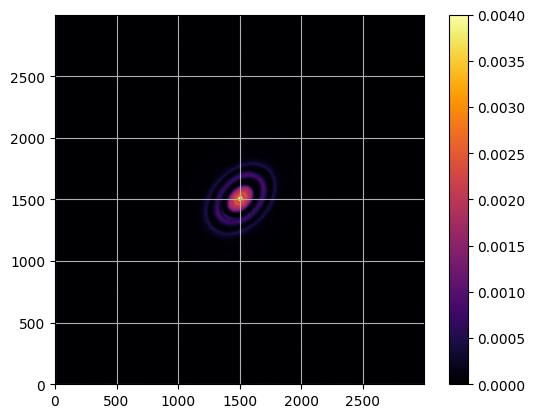

In [ ]:
plt.imshow(data.T, cmap='inferno', origin='lower', vmin=0, vmax=0.004)
plt.grid()
plt.colorbar()
plt.show()

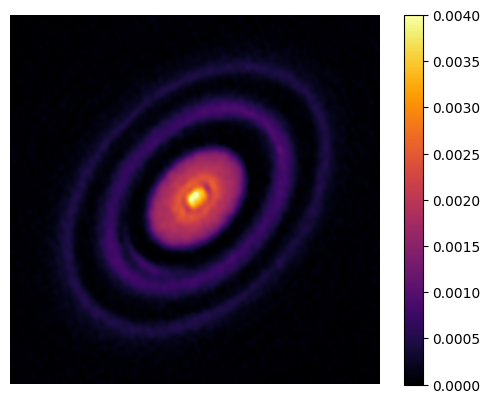

In [ ]:
plt.imshow(data.T[1100:1900, 1100:1900], cmap='inferno', origin='lower', vmin=0, vmax=0.004)
plt.axis('off')
plt.colorbar()
plt.show()

### Imaging with CASA

We will do a *very simple* imaging; for complete imaging, refer to python scripts from [DSHARP](https://almascience.eso.org/almadata/lp/DSHARP/).

In [ ]:
!tar -xzf HD163296_continuum.ms.tgz

In [ ]:
!ls HD163296_continuum.ms

ANTENNA		    PROCESSOR	     table.f17	     table.f24
ASDM_ANTENNA	    SOURCE	     table.f17_TSM1  table.f24_TSM1
ASDM_CALATMOSPHERE  SPECTRAL_WINDOW  table.f17_TSM2  table.f25
ASDM_CALWVR	    STATE	     table.f17_TSM3  table.f25_TSM1
ASDM_RECEIVER	    SYSCAL	     table.f18	     table.f25_TSM2
ASDM_SOURCE	    SYSPOWER	     table.f19	     table.f25_TSM3
ASDM_STATION	    WEATHER	     table.f2	     table.f3
CALDEVICE	    table.dat	     table.f20	     table.f4
DATA_DESCRIPTION    table.f1	     table.f21	     table.f5
FEED		    table.f10	     table.f21_TSM0  table.f6
FIELD		    table.f11	     table.f22	     table.f7
FLAG_CMD	    table.f12	     table.f22_TSM1  table.f8
HISTORY		    table.f13	     table.f22_TSM2  table.f9
OBSERVATION	    table.f14	     table.f22_TSM3  table.info
POINTING	    table.f15	     table.f23	     table.lock
POLARIZATION	    table.f16	     table.f23_TSM1


HD163296_continuum.ms: The "Measurement Set" (CASA version of the visibilities)

Run `casa` in the directory that contains the `.ms`.

```
$ casa
CASA: ls
HD163296_continuum.ms
```

CASA has "tasks"
- `inp <task name>`: shows input parameters of the task

```
CASA: inp listobs
# listobs -- Get the summary of a MeasurementSet and list it in the logger or in a file
vis            = ''                      # Name of input visibility file (MS)
selectdata     = True                    # Data selection parameters
   spw         = ''                      # Selection based on spectral-window/frequency/channel.
   field       = ''                      # Selection based on field names or field index numbers. Default
                                         # is all.
   antenna     = ''                      # Selection based on antenna/baselines. Default is all.
   uvrange     = ''                      # Selection based on uv range. Default: entire range. Default
                                         # units: meters.
   timerange   = ''                      # Selection based on time range. Default is entire range.
   correlation = ''                      # Selection based on correlation. Default is all.
   scan        = ''                      # Selection based on scan numbers. Default is all.
   intent      = ''                      # Selection based on observation intent. Default is all.
   feed        = ''                      # Selection based on multi-feed numbers: Not yet implemented
   array       = ''                      # Selection based on (sub)array numbers. Default is all.
   observation = ''                      # Selection based on observation ID. Default is all.
verbose        = True                    # Controls level of information detail reported. True reports more
                                         # than False.
listfile       = ''                      # Name of disk file to write output. Default is none (output is
                                         # written to logger only).
listunfl       = False                   # List unflagged row counts? If true, it can have significant
                                         # negative performance impact.
cachesize      = 50.0                    # EXPERIMENTAL. Maximum size in megabytes of cache in which data
                                         # structures can be held.
```

There is also online document for tasks: [here](https://casadocs.readthedocs.io/en/stable/api/tt/casatasks.information.listobs.html) for `listobs` 

Run `listobs`.

```
CASA: listobs(vis="HD163296_continuum.ms", listfile="HD163296_continuum.ms.listobs")
```

Then we get the information about the data.

In [ ]:
!cat HD163296_continuum.ms.listobs

           MeasurementSet Name:  /home/mgj/wsl-ws/mgjeon.github.io/posts/CASA/HD163296_continuum.ms      MS Version 2
   Observer: mhughes     Project: uid://A001/X10f/X267  
Observation: ALMA

  Telescope Observation Date    Observer       Project        
  ALMA      [                   4.90858e+09, 4.90859e+09]mhughes        uid://A001/X10f/X267
  ALMA      [                   4.90944e+09, 4.90945e+09]mhughes        uid://A001/X10f/X267
  ALMA      [                   4.90962e+09, 4.90962e+09]mhughes        uid://A001/X10f/X267
  ALMA      [                   4.90971e+09, 4.90971e+09]mhughes        uid://A001/X10f/X267
  ALMA      [                   4.91074e+09, 4.91074e+09]mhughes        uid://A001/X10f/X267
  ALMA      [                   4.94546e+09, 4.94547e+09]isella         uid://A001/X10e/X583
  ALMA      [                   4.94572e+09, 4.94573e+09]isella         uid://A001/X10e/X583
  ALMA      [                   4.9458e+09, 4.9458e+09]isella         uid://A001/X10e/X583
 

Run `plotms` to look at the UV data: see [docs](https://casadocs.readthedocs.io/en/stable/api/tt/casaplotms.plotms.html)

**Observational Geometry Axes**

- uvdist
    - uv distance (baseline separations), in meters. Calculated as sqrt(u*u+v*v), where u and v are values from the UVW column.

- uvwave
    - uv distance (baseline separations) as a function of frequency, in units of the observing wavelength λ (lambda).

- u
    - u in meters, from the UVW column.

- v
    - v in meters, from the UVW column.

```
CASA: plotms(vis='HD163296_continuum.ms', xaxis='u', yaxis='v', avgchannel='10000', avgspw=False, avgtime='1e9', avgscan=False, coloraxis='field', showgui=True)
```

![UV coverage](uv.png){fig-align="center"}

```
CASA: plotms(vis='HD163296_continuum.ms', xaxis='uvdist', yaxis='amp', avgchannel='10000', avgspw=False, avgtime='1e9', avgscan=False, coloraxis='field', showgui=True)
```

![Amplitude vs UVdist](uvdist.png){fig-align="center"}

![Amplitude vs UVwave](uvwave.png){fig-align="center"}

```
Spectral Windows:  (24 unique spectral windows and 1 unique polarization setups)
SpwID  Name                                      #Chans   Frame   Ch0(MHz)  ChanWid(kHz)  TotBW(kHz) CtrFreq(MHz) BBC Num  Corrs  
16     X308876093#ALMA_RB_06#BB_2#SW-01#FULL_RES     16   TOPO  233520.212   -125000.000   2000000.0 232582.7119        2  XX  YY
17     X308876093#ALMA_RB_06#BB_3#SW-01#FULL_RES     16   TOPO  244033.254    125000.000   2000000.0 244970.7541        3  XX  YY
18     X308876093#ALMA_RB_06#BB_4#SW-01#FULL_RES     16   TOPO  245950.254    125000.000   2000000.0 246887.7541        4  XX  YY

Antennas: 119:
ID   Name  Station   Diam.    Long.         Lat.                Offset from array center (m)                ITRF Geocentric coordinates (m)        
                                                                    East         North     Elevation               x               y               z
0    DA42  A081      12.0 m   -067.45.23.9  -22.53.32.5       -174.5619     -842.8377       21.0905  2224863.873287 -5440088.016080 -2481814.531226
```

In [ ]:
import astropy.units as u

In [ ]:
CtrFreq = 246887.7541 * u.MHz
wavelength = CtrFreq.to(u.m, equivalencies=u.spectral())
wavelength

<Quantity 0.00121429 m>

In [ ]:
longest_baseline = 5800 * u.m
longest_baseline_in_wavelength = longest_baseline / wavelength
longest_baseline_in_wavelength

<Quantity 4776467.63808848>

In [ ]:
f"{longest_baseline_in_wavelength:.2g}"

'4.8e+06'

In [ ]:
synthesized_beam = (1/longest_baseline_in_wavelength)*u.rad
synthesized_beam = synthesized_beam.to(u.arcsec)
synthesized_beam 

<Quantity 0.04318355 arcsec>

In [ ]:
D = 12 * u.m
primary_beam_of_a_single_antenna = (wavelength / D)*u.rad
primary_beam_of_a_single_antenna = primary_beam_of_a_single_antenna.to(u.arcsec)
primary_beam_of_a_single_antenna

<Quantity 20.87204686 arcsec>

In [ ]:
cell_size = synthesized_beam / 5
cell_size

<Quantity 0.00863671 arcsec>

In [ ]:
image_size = primary_beam_of_a_single_antenna / cell_size
image_size

<Quantity 2416.66666667>

Based on the above calucations, we select 

- `cell=0.01arcsec`
- `imsize=2500`

We have field `0`

```
Fields: 1
  ID   Code Name                RA               Decl           Epoch   SrcId      nRows
  0    none HD_163296           17:56:21.279270 -21.57.22.56348 J2000   0        2393820
```

Run `tclean` for imaging: see [docs](https://casadocs.readthedocs.io/en/stable/api/tt/casatasks.imaging.tclean.html#tclean)

```
CASA: tclean(vis='HD163296_continuum.ms',
             imagename='image_2500_001',
             field='0',
             spw='',
             specmode='mfs',
             deconvolver='hogbom',
             nterms=1,
             gridder='standard',
             imsize=2500,
             cell='0.01arcsec',
             weighting='briggs',
             robust=0.5,
             niter=5000,
             threshold='0.0mJy',
             interactive=True)
```

Then the following window opens

![](tclean.png){fig-align="center"}

For a detailed explanation, see [this guide](https://casaguides.nrao.edu/index.php/First_Look_at_Imaging_CASA_6.6.1).

Or, we can do `tclean` with `interactive=False`.

```
CASA: tclean(vis='HD163296_continuum.ms',
             imagename='image_2500_001',
             field='0',
             spw='',
             specmode='mfs',
             deconvolver='hogbom',
             nterms=1,
             gridder='standard',
             imsize=2500,
             cell='0.01arcsec',
             weighting='briggs',
             robust=0.5,
             niter=5000,
             threshold='0.0mJy',
             interactive=False)
```

In [ ]:
!ls -d image_2500_001* | sort

image_2500_001.image
image_2500_001.mask
image_2500_001.model
image_2500_001.pb
image_2500_001.psf
image_2500_001.residual
image_2500_001.sumwt


- `.image` is the final cleaned image
- `.mask` shows the clean mask, or the area that tclean cleaned
- `.model` is the set of modeled clean components used by tclean (in Jy/pixel)
- `.pb` shows the primary beam response
- `.psf` shows the synthesized beam
- `.residual` shows what was left after you stopped tclean (the "dirty" part of the final image)
- `.sumwt` is a single pixel image containing sum of weights per plane

We can see the final cleaned image using [CARTA](https://cartavis.org/carta-backend/index.html).

![](carta.png){fig-align="center"}

Of course, we can export the image data to a fits file.

```
CASA: exportfits(imagename='image_2500_001.image',
                 fitsimage='image_2500_001.fits',
                 overwrite=True)
```

In [ ]:
!ls *.fits

HD163296_continuum.fits  image_2500_001.fits


In [ ]:
hdul = fits.open('image_2500_001.fits')
hdul.info()

Filename: image_2500_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     272   (2500, 2500, 1, 1)   float32   


In [ ]:
hdul[0].header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                 2500                                                  
NAXIS2  =                 2500                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   2.509948073162E-05                                                  
BMIN    =   1.987707076801E-05                                                  
BPA     =  -8.403878784180E+

In [ ]:
hdul[0].data.shape

(1, 1, 2500, 2500)

In [ ]:
data = hdul[0].data.squeeze()
data.shape

(2500, 2500)

In [ ]:
hdul.close()

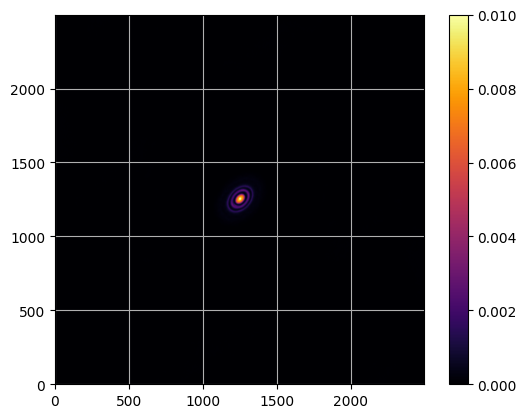

In [ ]:
plt.imshow(data.T, cmap='inferno', origin='lower', vmin=0, vmax=0.01)
plt.grid()
plt.colorbar()
plt.show()

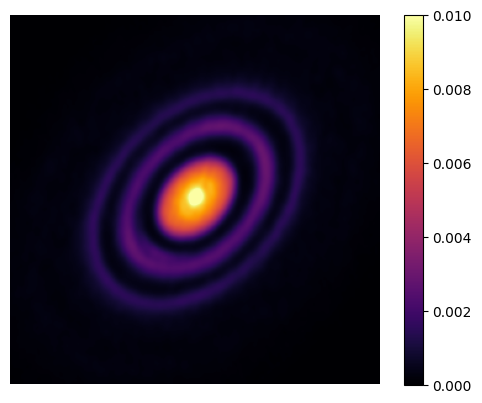

In [ ]:
plt.imshow(data.T[1100:1400, 1100:1400], cmap='inferno', origin='lower', vmin=0, vmax=0.01)
plt.axis('off')
plt.colorbar()
plt.show()